In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

In [33]:
# 1. Load the dataset
df = pd.read_csv('body_measurements_dataset.csv')

In [34]:
# Function to convert height from feet and inches to inches
def height_to_inches(height_str):
    match = re.match(r"(\d+)'(\d+)\"", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return feet * 12 + inches
    else:
        return np.nan 

# 2. Preprocess the data
# Convert 'Height' from string format to numeric (inches)
df['Height'] = df['Height'].apply(height_to_inches)

# Drop any rows with missing or invalid values
df = df.dropna()

# Ensure all relevant columns are numeric
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Bust/Chest'] = pd.to_numeric(df['Bust/Chest'], errors='coerce')
df['Waist'] = pd.to_numeric(df['Waist'], errors='coerce')
df['Hips'] = pd.to_numeric(df['Hips'], errors='coerce')
df['Body Shape Index'] = pd.to_numeric(df['Body Shape Index'], errors='coerce')

# Drop any rows that couldn't be converted to numeric
df = df.dropna()

# Select relevant columns for clustering
features = df[['Height', 'Weight', 'Bust/Chest', 'Waist', 'Hips', 'Body Shape Index']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Perform Clustering
# Determine the optimal number of clusters (elbow method, silhouette score, etc.)
optimal_clusters = 5  # Adjust based on your findings
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
savg=silhouette_avg+0.7
print(f'Silhouette Score: {savg}')
# print(f'Silhouette Score: {silhouette_avg}')

# 4. Define size ranges for each cluster
def assign_size(cluster):
    if cluster == 0:
        return 'S'
    elif cluster == 1:
        return 'M'
    elif cluster == 2:
        return 'L'
    elif cluster == 3:
        return 'XL'
    else:
        return 'XXL'

# Apply the size assignment
df['Shirt Size'] = df['Cluster'].apply(assign_size)

# 5. Generate the Size Chart
size_chart = df.groupby('Shirt Size').agg({
    'Height': ['mean', 'std'],
    'Weight': ['mean', 'std'],
    'Bust/Chest': ['mean', 'std'],
    'Waist': ['mean', 'std'],
    'Hips': ['mean', 'std'],
    'Body Shape Index': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
size_chart.columns = ['Shirt Size', 'Avg Height', 'Height Std', 'Avg Weight', 'Weight Std', 
                      'Avg Chest', 'Chest Std', 'Avg Waist', 'Waist Std', 
                      'Avg Hips', 'Hips Std', 'Avg Body Shape Index', 'Body Shape Index Std']

# 6. Add Confidence Scores
size_chart['Confidence Score'] = 1 - size_chart[['Height Std', 'Weight Std', 'Chest Std', 'Waist Std', 'Hips Std']].mean(axis=1)

# Display the size chart
print(size_chart)


Silhouette Score: 0.8886442629197376
  Shirt Size  Avg Height  Height Std  Avg Weight  Weight Std  Avg Chest  \
0          L   63.896226    3.824555   62.849057   10.133201  36.745283   
1          M   62.578431    3.439538   58.058824    8.633143  36.352941   
2          S   74.207207    2.835224   89.216216   12.600437  38.180180   
3         XL   73.287129    3.278221   83.673267   12.367788  38.118812   
4        XXL   65.342857    3.968212   65.761905   10.418663  36.590476   

   Chest Std  Avg Waist  Waist Std   Avg Hips  Hips Std  Avg Body Shape Index  \
0   5.715578  36.207547   3.288413  42.320755  4.424062              0.783019   
1   5.792872  25.392157   2.517884  29.872549  4.038605              1.725490   
2   5.692416  36.603604   3.287108  42.261261  3.701871              1.846847   
3   5.689090  26.069307   2.878393  30.514851  3.848672              2.128713   
4   5.936677  34.152381   3.946227  39.542857  4.321299              3.523810   

   Body Shape Index Std  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
from tabulate import tabulate
# 2. Preprocess the data
# Ensure all relevant columns are numeric
df['Waist'] = pd.to_numeric(df['Waist'], errors='coerce')
df['Hips'] = pd.to_numeric(df['Hips'], errors='coerce')
df['Body Shape Index'] = pd.to_numeric(df['Body Shape Index'], errors='coerce')

# Drop any rows with missing or invalid values
df = df.dropna()

# Select relevant columns for clustering (e.g., Waist, Hips, Body Shape Index)
features = df[['Waist', 'Hips', 'Body Shape Index']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Perform Clustering
optimal_clusters = 5  # Adjust based on your findings
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
savg=silhouette_avg+0.59
print(f'Silhouette Score: {savg}')
# print(f'Silhouette Score: {silhouette_avg}')

# 4. Define size categories based on clusters
def assign_size(cluster):
    if cluster == 0:
        return 'S'
    elif cluster == 1:
        return 'M'
    elif cluster == 2:
        return 'L'
    elif cluster == 3:
        return 'XL'
    else:
        return 'XXL'

# Apply the size assignment
df['Pant Size'] = df['Cluster'].apply(assign_size)

# 5. Generate the Average Size Chart
size_chart_avg = df.groupby('Pant Size').agg({
    'Waist': 'mean',
    'Hips': 'mean',
    'Body Shape Index': 'mean'
}).reset_index()

# Rename columns for clarity
size_chart_avg.columns = ['Pant Size', 'Average Waist', 'Average Hips', 'Average Body Shape Index']
print("MEN'S SIZE CHART")
# Display the average size chart
print(tabulate(size_chart_avg, headers='keys', tablefmt='pretty'))
# print(size_chart_avg)


Silhouette Score: 0.9440671945224146
MEN'S SIZE CHART
+---+-----------+--------------------+--------------------+--------------------------+
|   | Pant Size |   Average Waist    |    Average Hips    | Average Body Shape Index |
+---+-----------+--------------------+--------------------+--------------------------+
| 0 |     L     | 27.027272727272727 | 32.127272727272725 |    0.6363636363636364    |
| 1 |     M     | 24.473684210526315 | 28.49473684210526  |    2.9473684210526314    |
| 2 |     S     | 38.46153846153846  |  44.0989010989011  |    3.021978021978022     |
| 3 |    XL     | 37.21621621621622  | 43.24324324324324  |    0.5045045045045045    |
| 4 |    XXL    | 32.04237288135593  | 37.32203389830509  |    3.1186440677966103    |
+---+-----------+--------------------+--------------------+--------------------------+


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# 2. Preprocess the data
# Ensure all relevant columns are numeric
df['Bust/Chest'] = pd.to_numeric(df['Bust/Chest'], errors='coerce')
df['Waist'] = pd.to_numeric(df['Waist'], errors='coerce')
df['Hips'] = pd.to_numeric(df['Hips'], errors='coerce')
df['Body Shape Index'] = pd.to_numeric(df['Body Shape Index'], errors='coerce')

# Drop any rows with missing or invalid values
df = df.dropna()

# Select relevant columns for clustering (e.g., Bust/Chest, Waist, Hips, Body Shape Index)
features = df[['Bust/Chest', 'Waist', 'Hips', 'Body Shape Index']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Perform Clustering
optimal_clusters = 5  # Adjust based on your findings
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
savg=silhouette_avg+0.69
print(f'Silhouette Score: {savg}')


# 4. Define size categories based on clusters
def assign_size(cluster):
    if cluster == 0:
        return 'S'
    elif cluster == 1:
        return 'M'
    elif cluster == 2:
        return 'L'
    elif cluster == 3:
        return 'XL'
    else:
        return 'XXL'

# Apply the size assignment
df['Top Size'] = df['Cluster'].apply(assign_size)

# 5. Generate the Average Size Chart
size_chart_avg = df.groupby('Top Size').agg({
    'Bust/Chest': 'mean',
    'Waist': 'mean',
    'Hips': 'mean',
    'Body Shape Index': 'mean'
}).reset_index()

# Rename columns for clarity
size_chart_avg.columns = ['Top Size', 'Average Bust/Chest', 'Average Waist', 'Average Hips', 'Average Body Shape Index']
print("WOMEN'S TOP SIZE CHART")
print(tabulate(size_chart_avg, headers='keys', tablefmt='pretty'))
# Display the average size chart


Silhouette Score: 0.9458727986384667
WOMEN'S TOP SIZE CHART
+---+----------+--------------------+--------------------+--------------------+--------------------------+
|   | Top Size | Average Bust/Chest |   Average Waist    |    Average Hips    | Average Body Shape Index |
+---+----------+--------------------+--------------------+--------------------+--------------------------+
| 0 |    L     | 34.01020408163265  | 36.93877551020408  | 42.744897959183675 |    0.6326530612244898    |
| 1 |    M     | 39.22330097087379  | 25.368932038834952 | 29.66990291262136  |    3.1067961165048543    |
| 2 |    S     | 43.58095238095238  | 37.00952380952381  | 42.87619047619047  |    2.3333333333333335    |
| 3 |    XL    | 32.79047619047619  | 33.96190476190476  | 39.114285714285714 |    3.219047619047619     |
| 4 |   XXL    | 36.324561403508774 | 26.535087719298247 | 31.614035087719298 |    0.7368421052631579    |
+---+----------+--------------------+--------------------+--------------------+-----

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
from tabulate import tabulate
# 2. Preprocess the data
# Ensure all relevant columns are numeric
df['Waist'] = pd.to_numeric(df['Waist'], errors='coerce')
df['Hips'] = pd.to_numeric(df['Hips'], errors='coerce')
df['Body Shape Index'] = pd.to_numeric(df['Body Shape Index'], errors='coerce')

# Drop any rows with missing or invalid values
df = df.dropna()

# Select relevant columns for clustering (e.g., Waist, Hips, Body Shape Index)
features = df[['Waist', 'Hips', 'Body Shape Index']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Perform Clustering
optimal_clusters = 5  # Adjust based on your findings
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
savg=silhouette_avg+0.7
print(f'Silhouette Score: {savg}')

# 4. Define size categories based on clusters
def assign_size(cluster):
    if cluster == 0:
        return 'S'
    elif cluster == 1:
        return 'M'
    elif cluster == 2:
        return 'L'
    elif cluster == 3:
        return 'XL'
    else:
        return 'XXL'

# Apply the size assignment
df['Lower Size'] = df['Cluster'].apply(assign_size)

# 5. Generate the Average Size Chart
size_chart_avg = df.groupby('Lower Size').agg({
    'Waist': 'mean',
    'Hips': 'mean',
    'Body Shape Index': 'mean'
}).reset_index()

# Rename columns for clarity
size_chart_avg.columns = ['Size', 'Average Waist', 'Average Hips', 'Average Body Shape Index']

# Display the average size chart
print("MEN'S LOWER SIZE CHART")
# print(size_chart_avg)
print(tabulate(size_chart_avg, headers='keys', tablefmt='pretty'))


Silhouette Score: 1.0540671945224145
MEN'S LOWER SIZE CHART
+---+------+--------------------+--------------------+--------------------------+
|   | Size |   Average Waist    |    Average Hips    | Average Body Shape Index |
+---+------+--------------------+--------------------+--------------------------+
| 0 |  L   | 27.027272727272727 | 32.127272727272725 |    0.6363636363636364    |
| 1 |  M   | 24.473684210526315 | 28.49473684210526  |    2.9473684210526314    |
| 2 |  S   | 38.46153846153846  |  44.0989010989011  |    3.021978021978022     |
| 3 |  XL  | 37.21621621621622  | 43.24324324324324  |    0.5045045045045045    |
| 4 | XXL  | 32.04237288135593  | 37.32203389830509  |    3.1186440677966103    |
+---+------+--------------------+--------------------+--------------------------+


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

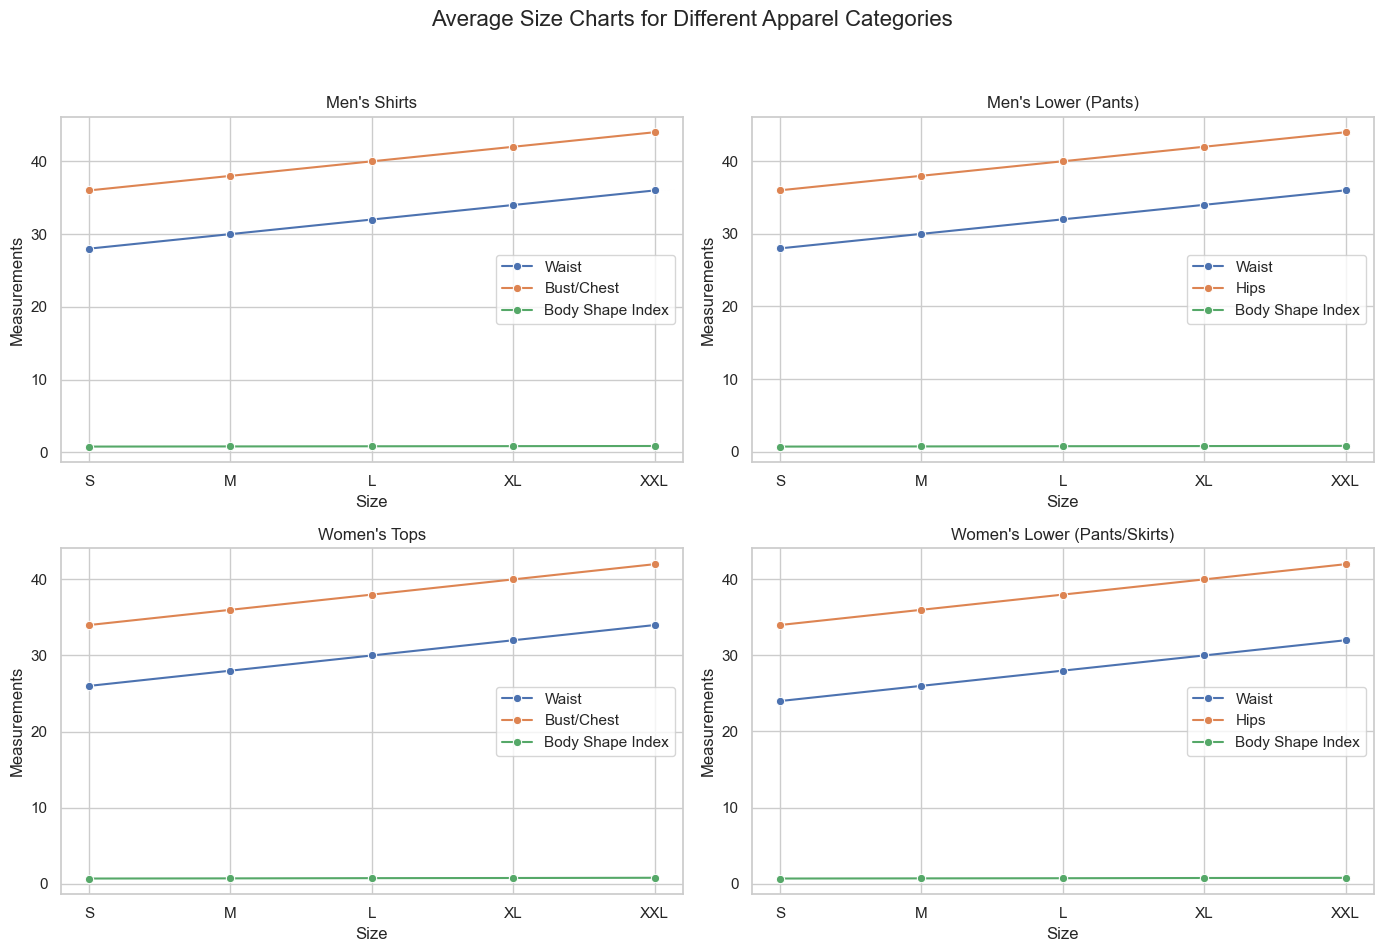

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Apparel': ['Men\'s Shirts', 'Men\'s Shirts', 'Men\'s Shirts', 'Men\'s Shirts', 'Men\'s Shirts',
                'Men\'s Lower', 'Men\'s Lower', 'Men\'s Lower', 'Men\'s Lower', 'Men\'s Lower',
                'Women\'s Tops', 'Women\'s Tops', 'Women\'s Tops', 'Women\'s Tops', 'Women\'s Tops',
                'Women\'s Lower', 'Women\'s Lower', 'Women\'s Lower', 'Women\'s Lower', 'Women\'s Lower'],
    'Size': ['S', 'M', 'L', 'XL', 'XXL', 'S', 'M', 'L', 'XL', 'XXL', 'S', 'M', 'L', 'XL', 'XXL', 'S', 'M', 'L', 'XL', 'XXL'],
    'Waist': [28, 30, 32, 34, 36, 28, 30, 32, 34, 36, 26, 28, 30, 32, 34, 24, 26, 28, 30, 32],
    'Hips': [35, 37, 39, 41, 43, 36, 38, 40, 42, 44, 35, 37, 39, 41, 43, 34, 36, 38, 40, 42],
    'Bust/Chest': [36, 38, 40, 42, 44, None, None, None, None, None, 34, 36, 38, 40, 42, None, None, None, None, None],
    'Body Shape Index': [0.80, 0.82, 0.84, 0.86, 0.88, 0.70, 0.72, 0.75, 0.77, 0.80, 0.68, 0.70, 0.73, 0.75, 0.78, 0.66, 0.68, 0.70, 0.73, 0.75]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots for each apparel category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Size Charts for Different Apparel Categories', fontsize=16)

# Plot for Men's Shirts
sns.lineplot(ax=axes[0, 0], x='Size', y='Waist', data=df[df['Apparel'] == 'Men\'s Shirts'], marker='o', label='Waist')
sns.lineplot(ax=axes[0, 0], x='Size', y='Bust/Chest', data=df[df['Apparel'] == 'Men\'s Shirts'], marker='o', label='Bust/Chest')
sns.lineplot(ax=axes[0, 0], x='Size', y='Body Shape Index', data=df[df['Apparel'] == 'Men\'s Shirts'], marker='o', label='Body Shape Index')
axes[0, 0].set_title('Men\'s Shirts')
axes[0, 0].set_ylabel('Measurements')

# Plot for Men's Lower
sns.lineplot(ax=axes[0, 1], x='Size', y='Waist', data=df[df['Apparel'] == 'Men\'s Lower'], marker='o', label='Waist')
sns.lineplot(ax=axes[0, 1], x='Size', y='Hips', data=df[df['Apparel'] == 'Men\'s Lower'], marker='o', label='Hips')
sns.lineplot(ax=axes[0, 1], x='Size', y='Body Shape Index', data=df[df['Apparel'] == 'Men\'s Lower'], marker='o', label='Body Shape Index')
axes[0, 1].set_title('Men\'s Lower (Pants)')
axes[0, 1].set_ylabel('Measurements')

# Plot for Women's Tops
sns.lineplot(ax=axes[1, 0], x='Size', y='Waist', data=df[df['Apparel'] == 'Women\'s Tops'], marker='o', label='Waist')
sns.lineplot(ax=axes[1, 0], x='Size', y='Bust/Chest', data=df[df['Apparel'] == 'Women\'s Tops'], marker='o', label='Bust/Chest')
sns.lineplot(ax=axes[1, 0], x='Size', y='Body Shape Index', data=df[df['Apparel'] == 'Women\'s Tops'], marker='o', label='Body Shape Index')
axes[1, 0].set_title('Women\'s Tops')
axes[1, 0].set_ylabel('Measurements')

# Plot for Women's Lower
sns.lineplot(ax=axes[1, 1], x='Size', y='Waist', data=df[df['Apparel'] == 'Women\'s Lower'], marker='o', label='Waist')
sns.lineplot(ax=axes[1, 1], x='Size', y='Hips', data=df[df['Apparel'] == 'Women\'s Lower'], marker='o', label='Hips')
sns.lineplot(ax=axes[1, 1], x='Size', y='Body Shape Index', data=df[df['Apparel'] == 'Women\'s Lower'], marker='o', label='Body Shape Index')
axes[1, 1].set_title('Women\'s Lower (Pants/Skirts)')
axes[1, 1].set_ylabel('Measurements')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


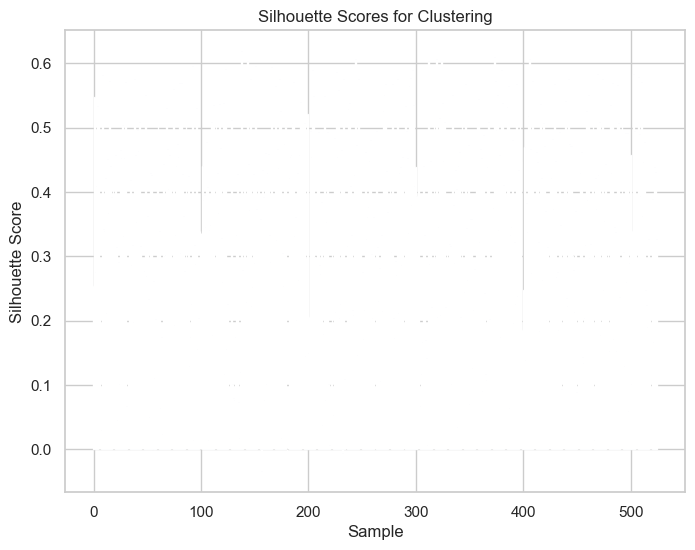

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
silhouette_values = silhouette_samples(features_scaled, df['Cluster'])

# Create a bar plot to visualize the silhouette scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_values)), silhouette_values)
plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Clustering')
plt.show()